In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
from evolve import evolve, show

# Derivatives definition
def S_dot_f(state, beta):
    outcoming = beta * state[0] * state[1]
    return - outcoming 

def I_dot_f(state, alpha, beta, gamma):
    incoming = beta * state[0] * state[1]
    outcoming = (alpha + gamma) * state[1]
    return incoming - outcoming

def T_dot_f(state, gamma, eta):
    incoming = gamma * state[1]
    outcoming = eta * state[2]
    return incoming - outcoming
    
def R_dot_f(state, alpha, eta, f, fT):
    incoming = f * alpha * state[1] + fT * eta * state[2]
    return incoming

def N_dot_f(state, alpha, eta, f, fT):
    outcoming = alpha * (1 - f) * state[1] + eta * (1 - fT) * state[2]
    return - outcoming

def deriv(state, t, alpha, beta, gamma, eta, f, fT):
    S_dot = S_dot_f(state, beta)
    I_dot = I_dot_f(state, alpha, beta, gamma)
    T_dot = T_dot_f(state, gamma, eta)
    R_dot = R_dot_f(state, alpha, eta, f, fT)
    N_dot = N_dot_f(state, alpha, eta, f, fT)
    return np.asarray([S_dot, I_dot, T_dot, R_dot, N_dot])

In [22]:
# Parameters
alpha = 0.001 # rate of people leaving the infected (dead or recovered)
beta = 0.004 # rate of people leaving the susceptibles per infected
gamma = 0.15 # rate of infected people who get a treatment
eta = 0.1 # rate of people who stop the treatment (dead or recovered)
f = 0.4 # rate of people stopping being infected who survive
fT = 0.9 # rate of people stopping being treated who survive
deriv_params = (alpha, beta, gamma, eta, f, fT) # same order as in the deriv function's arguments

# Initial conditions
N0 = 100
S0 = 95
I0 = 5
T0 = 0
R0 = 0
state0 = np.asarray([S0, I0, T0, R0, N0])

timelength = 130
legend = ['susceptibles', 'infected', 'treated', 'removed', 'total pop']

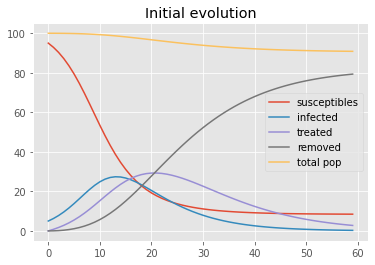

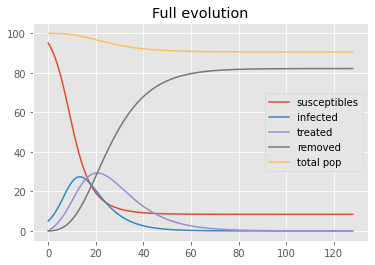

In [23]:
# evolve
history = evolve(deriv, state0, timelength, deriv_params)

# visualize
show(history, legend=legend, title='Initial evolution', last_t=60)
show(history, legend=legend, title='Full evolution')